<a href="https://colab.research.google.com/github/AkhileshMauryaa/Personal_Management_financial_app/blob/main/Personal_Management_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/personal_finance_management.csv')
df.head()

,Date,Time,Mode,Category,Subcategory,Type,Amount,Description
0,2022-08-14,07:16:00,Credit Card,Food,Coffee,Expense,1576.15,Leave brother bank better she increase try.
1,2023-06-16,03:36:22,Credit Card,Transport,Train,Expense,1923.33,Stand next though house.
2,2022-11-26,00:40:03,Credit Card,Entertainment,Subscription,Expense,987.08,Detail subject everything goal yes blue tonight.
3,2023-10-25,12:13:24,Cash,Shopping,Clothes,Expense,1262.74,Represent since method left plant.
4,2023-02-05,02:51:27,Debit Card,Income,Freelance,Income,4300.48,Budget situation between.


## Understanding the Data

In [ ]:
df.shape

(5000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5000 non-null   object 
 1   Time         5000 non-null   object 
 2   Mode         5000 non-null   object 
 3   Category     5000 non-null   object 
 4   Subcategory  5000 non-null   object 
 5   Type         5000 non-null   object 
 6   Amount       5000 non-null   float64
 7   Description  5000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 312.6+ KB


In [ ]:
df.isnull().sum()

Date           0
Time           0
Mode           0
Category       0
Subcategory    0
Type           0
Amount         0
Description    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe(include='all')

,Date,Time,Mode,Category,Subcategory,Type,Amount,Description
count,5000,5000,5000,5000,5000,5000,5000.000000,5000
unique,729,4866,4,7,22,2,NaN,5000
top,2023-08-07,07:41:44,Cash,Utilities,Gym,Expense,NaN,Leave brother bank better she increase try.
freq,19,3,1281,753,273,4331,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,1241.565154,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,919.951670,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,5.140000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,586.792500,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1129.645000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1655.800000,NaN


## Converting Data Types:

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time']).dt.time
df['Category'] = df['Category'].astype('category')
df['Subcategory'] = df['Subcategory'].astype('category')
df['Type'] = df['Type'].astype('category')
df['Mode'] = df['Mode'].astype('category')

In [ ]:
df.head()

,Date,Time,Mode,Category,Subcategory,Type,Amount,Description
0,2022-08-14,07:16:00,Credit Card,Food,Coffee,Expense,1576.15,Leave brother bank better she increase try.
1,2023-06-16,03:36:22,Credit Card,Transport,Train,Expense,1923.33,Stand next though house.
2,2022-11-26,00:40:03,Credit Card,Entertainment,Subscription,Expense,987.08,Detail subject everything goal yes blue tonight.
3,2023-10-25,12:13:24,Cash,Shopping,Clothes,Expense,1262.74,Represent since method left plant.
4,2023-02-05,02:51:27,Debit Card,Income,Freelance,Income,4300.48,Budget situation between.


In [ ]:
df.dtypes

Date           datetime64[ns]
Time                   object
Mode                 category
Category             category
Subcategory          category
Type                 category
Amount                float64
Description            object
dtype: object

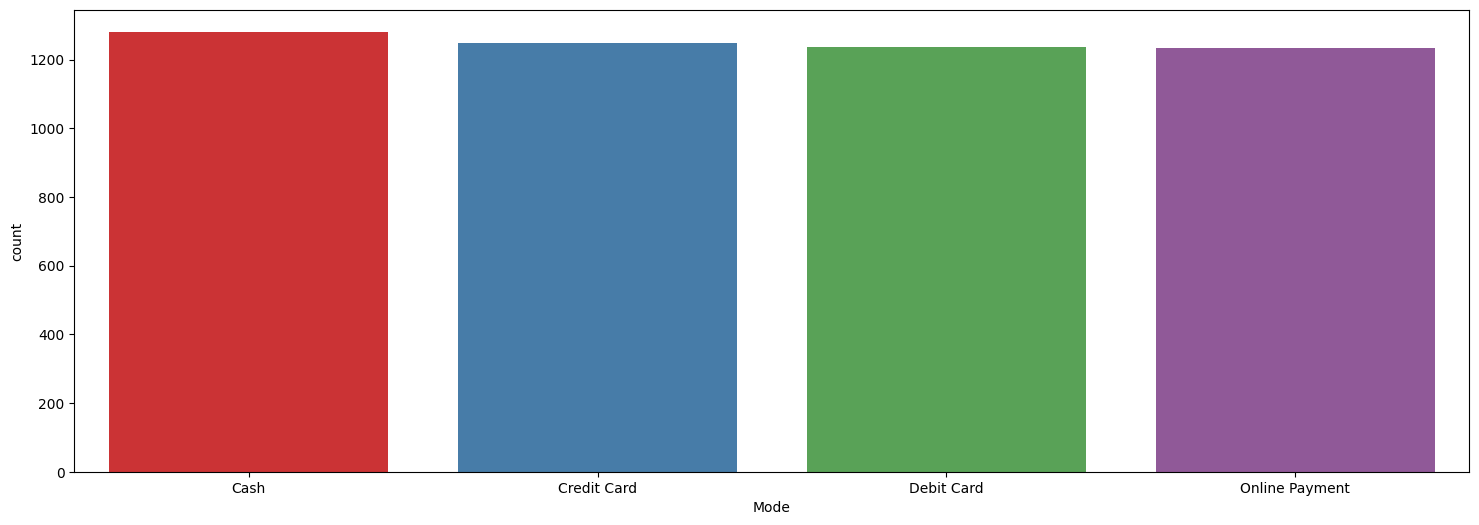

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='Mode',data=df, order=df['Mode'].value_counts().index, palette='Set1')
plt.show()

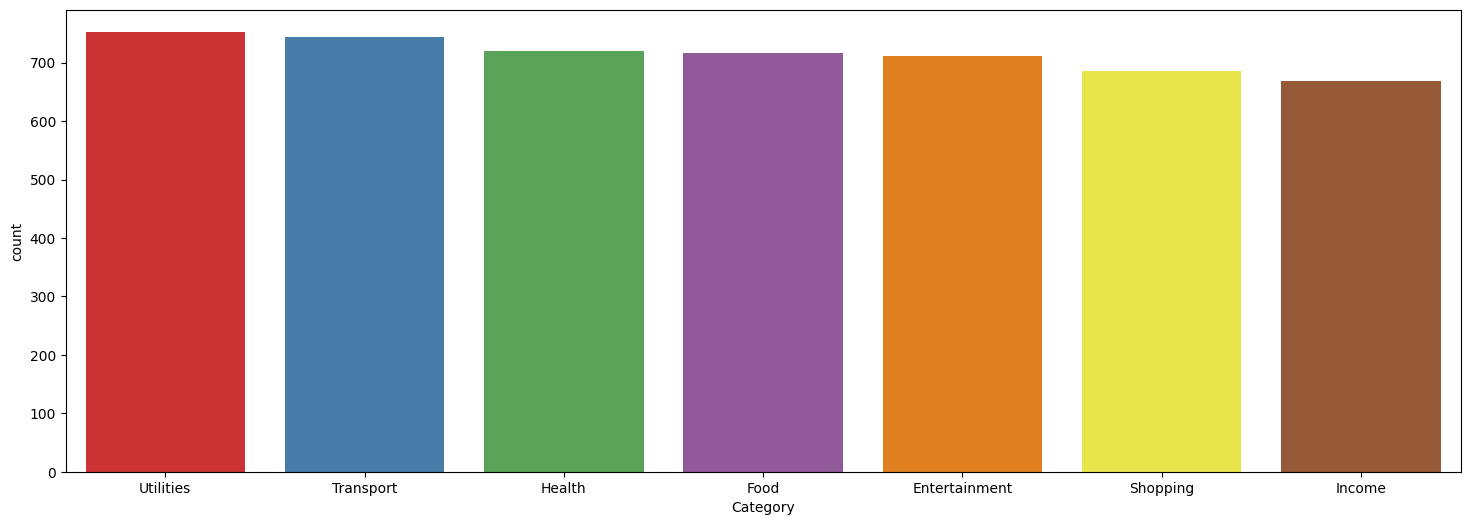

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='Category',data=df, order=df['Category'].value_counts().index, palette='Set1')
plt.show()

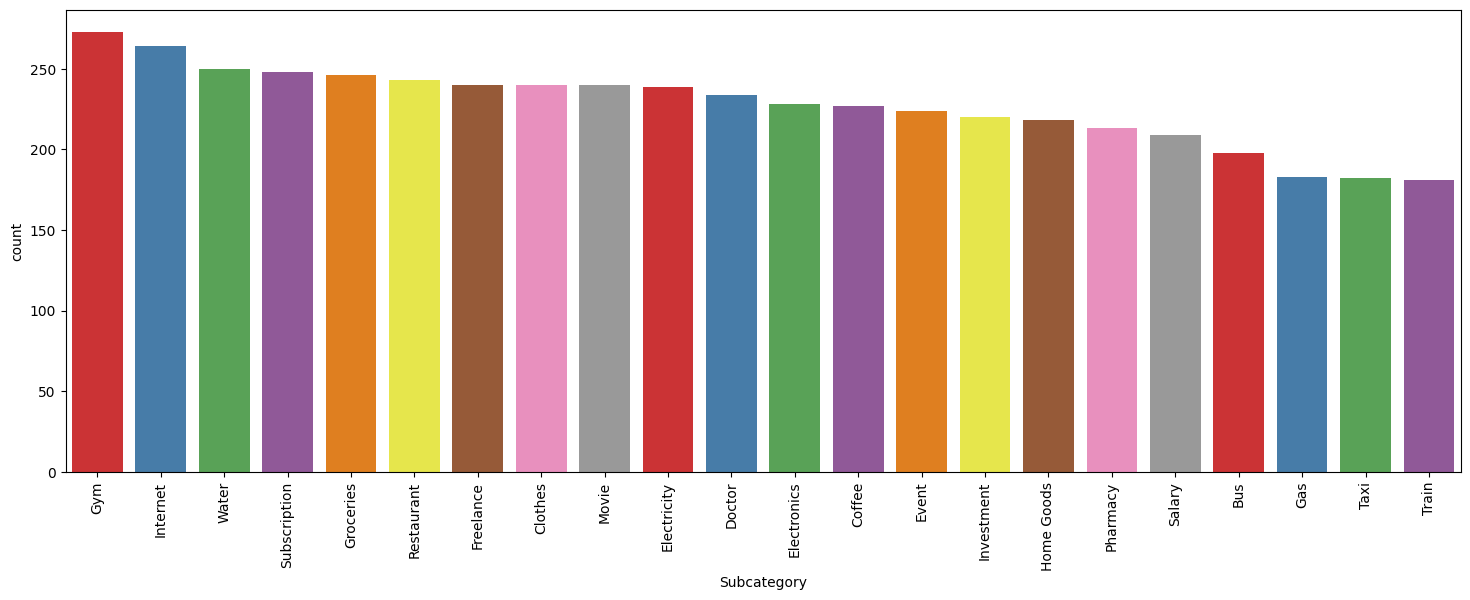

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='Subcategory',data=df, order=df['Subcategory'].value_counts().index, palette='Set1')
plt.xticks(rotation=90)
plt.show()

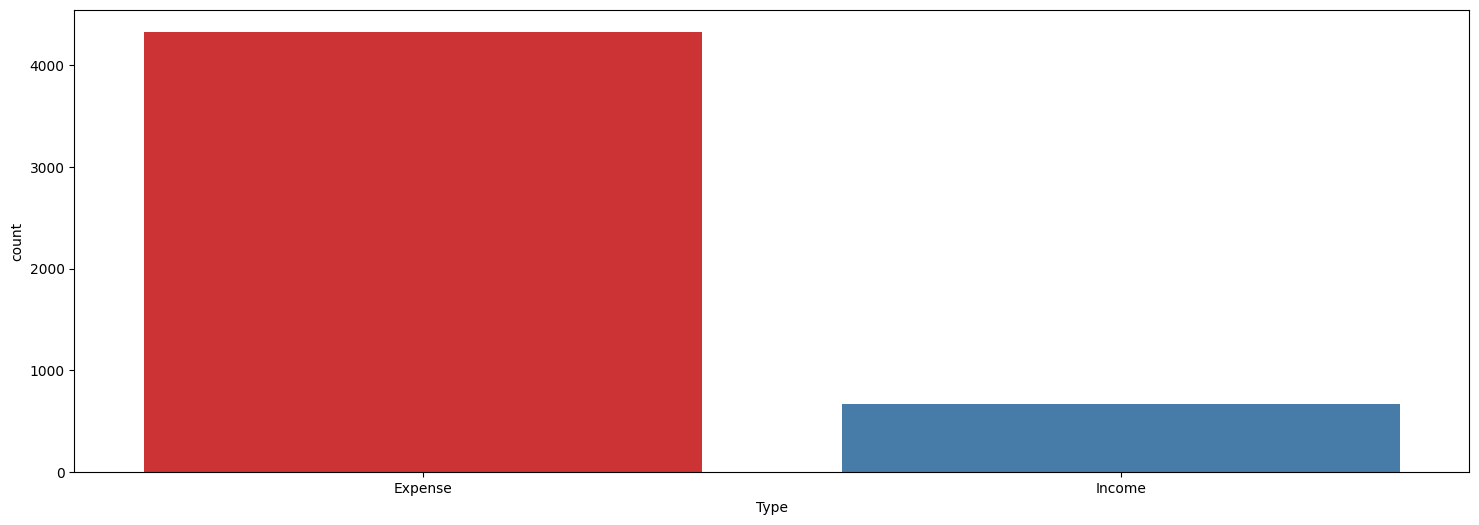

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='Type',data=df, order=df['Type'].value_counts().index, palette='Set1')
plt.show()

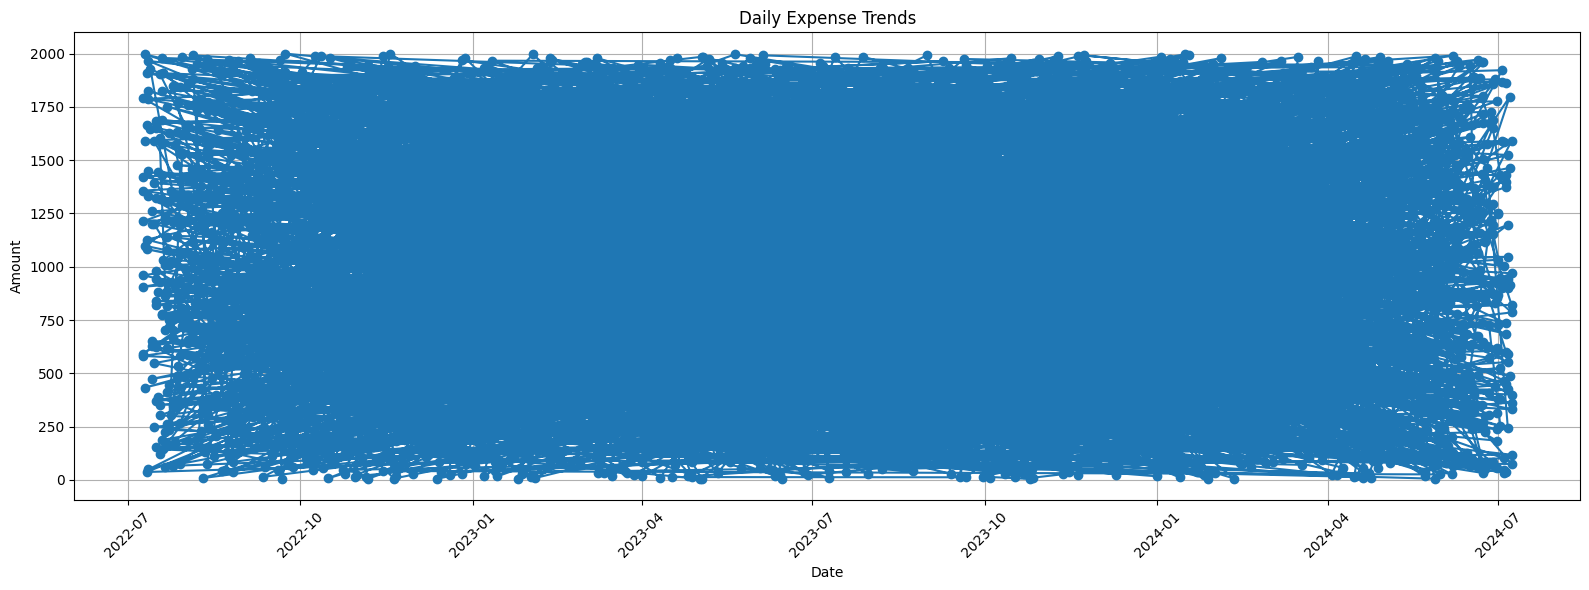

In [ ]:
expenses = df[df['Type'] == 'Expense']

# Plot daily expenses trends
plt.figure(figsize=(16, 6))
plt.plot(expenses['Date'], expenses['Amount'], marker='o', linestyle='-')
plt.title('Daily Expense Trends')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

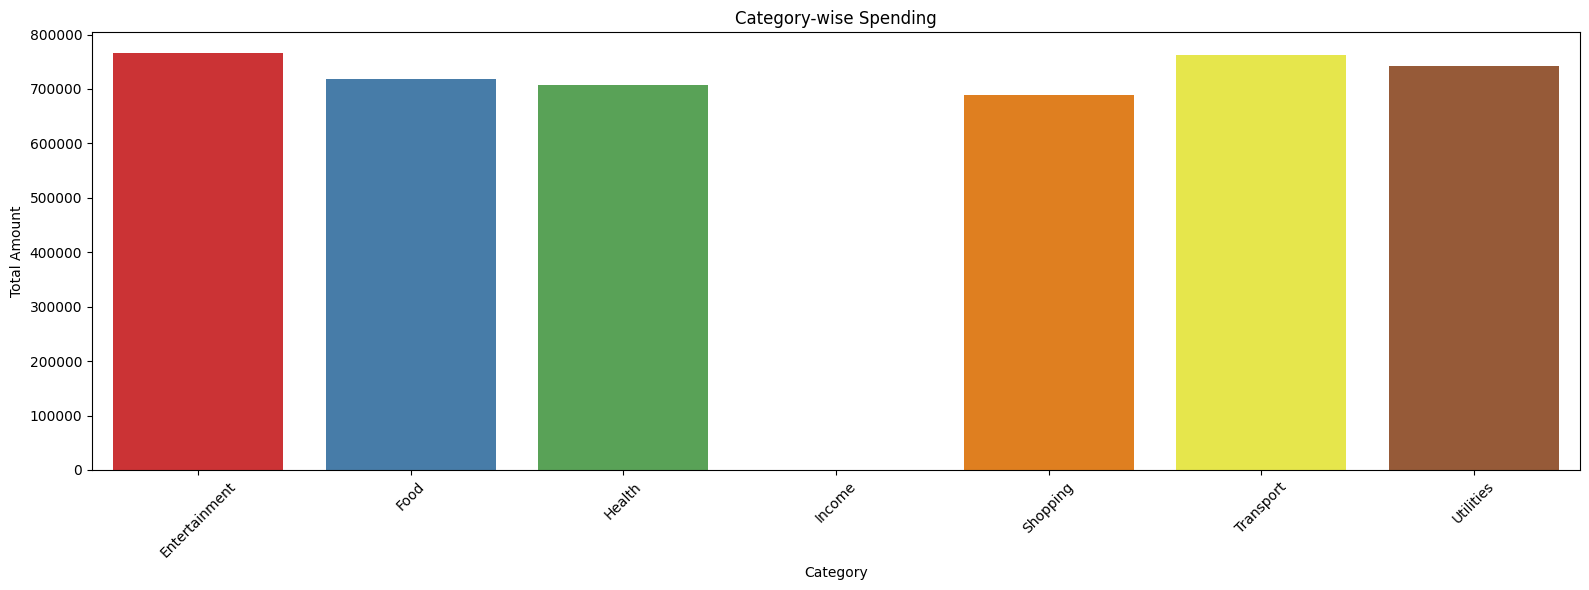

In [ ]:
# Group by category and sum the expenses
category_expenses = expenses.groupby('Category')['Amount'].sum().reset_index()

# Plot category-wise spending
plt.figure(figsize=(16, 6))
sns.barplot(data=category_expenses, x='Category', y='Amount',palette='Set1')
plt.title('Category-wise Spending')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

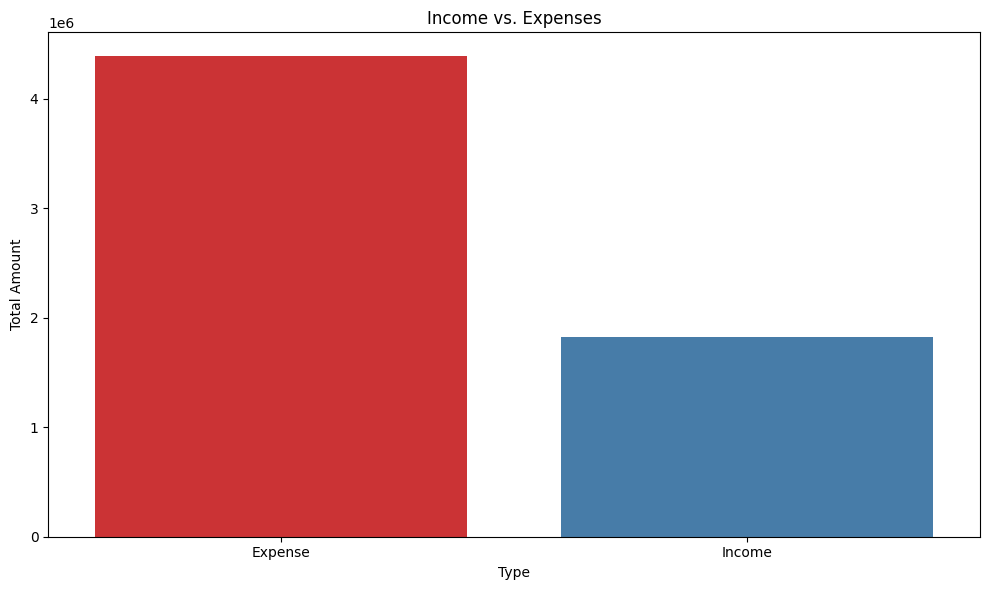

In [ ]:
# Group by type (Income/Expense) and sum the amounts
income_expenses = df.groupby('Type')['Amount'].sum().reset_index()

# Plot income vs expenses
plt.figure(figsize=(10, 6))
sns.barplot(data=income_expenses, x='Type', y='Amount',palette='Set1')
plt.title('Income vs. Expenses')
plt.xlabel('Type')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()


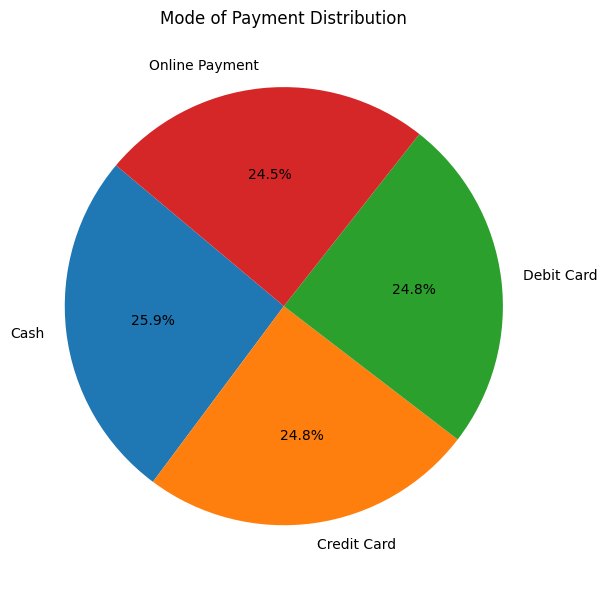

In [ ]:
# Group by mode and sum the expenses
mode_expenses = expenses.groupby('Mode')['Amount'].sum().reset_index()

# Plot mode of payment distribution
plt.figure(figsize=(8, 6))
plt.pie(mode_expenses['Amount'], labels=mode_expenses['Mode'], autopct='%1.1f%%', startangle=140)
plt.title('Mode of Payment Distribution')
plt.tight_layout()
plt.show()


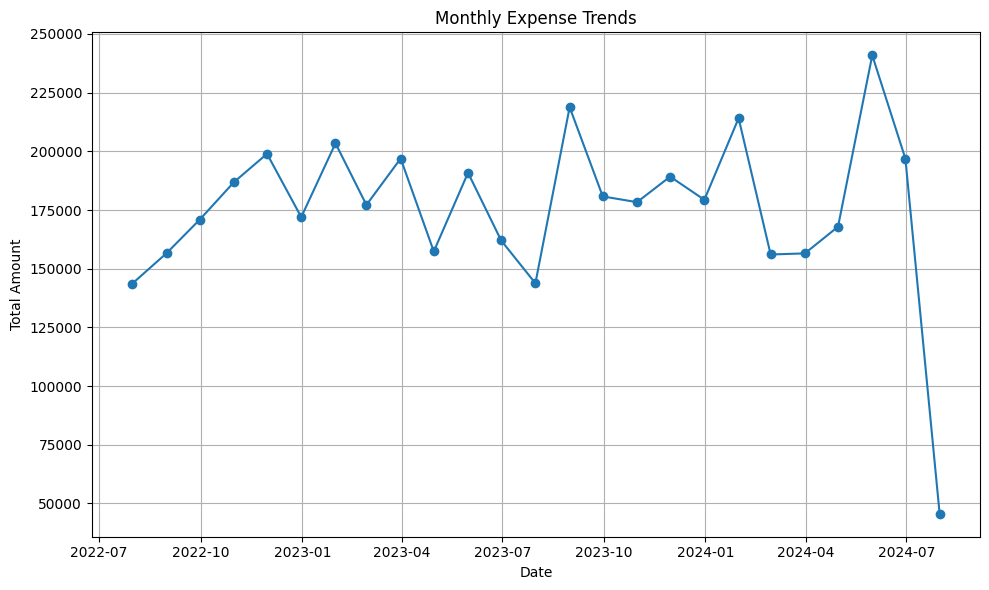

In [ ]:
# Filter only expense transactions
expense_data = df[df['Type'] == 'Expense'][['Date', 'Amount']]

# Set the date as the index
expense_data.set_index('Date', inplace=True)

# Resample the data to get monthly total expenses
monthly_expenses = expense_data.resample('M').sum()


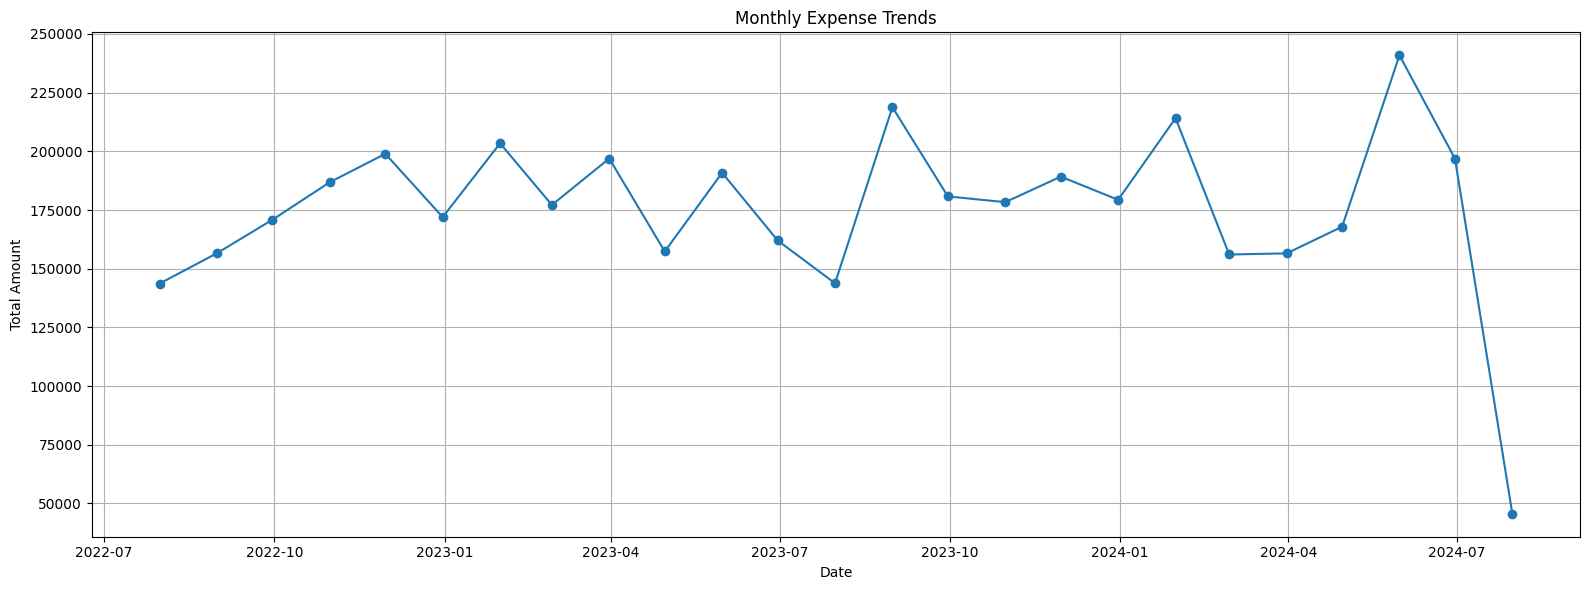

In [ ]:

# Plot the monthly expenses
plt.figure(figsize=(16, 6))
plt.plot(monthly_expenses, marker='o', linestyle='-')
plt.title('Monthly Expense Trends')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                   25
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -291.412
Date:                Fri, 12 Jul 2024   AIC                            588.825
Time:                        14:58:16   BIC                            592.359
Sample:                    07-31-2022   HQIC                           589.763
                         - 07-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4219      0.580      0.727      0.467      -0.716       1.559
ma.L1         -0.6672      0.495     -1.348      0.178      -1.637       0.303
sigma2      1.531e+09   1.56e-09    9.8e+17      0.0

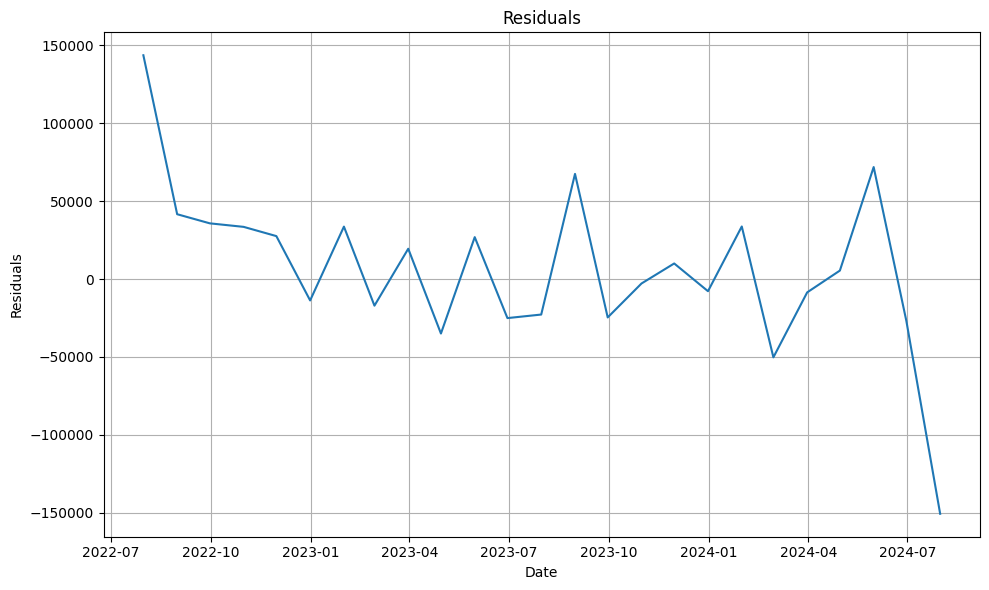

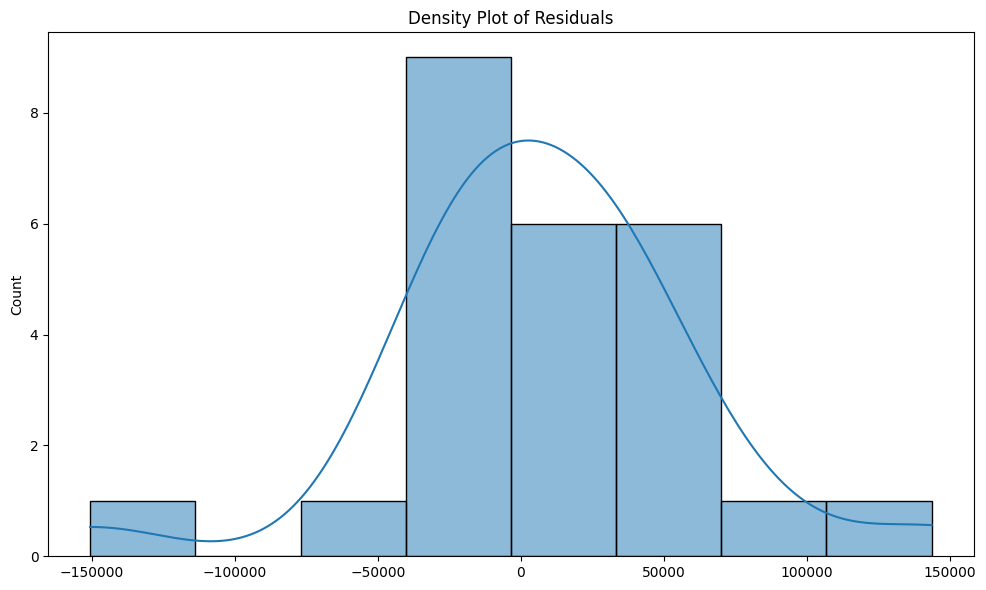

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Define the ARIMA model using the updated class
model = ARIMA(monthly_expenses, order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Print the model summary
print(model_fit.summary())

# Plot the residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# Density plot of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Density Plot of Residuals')
plt.tight_layout()
plt.show()

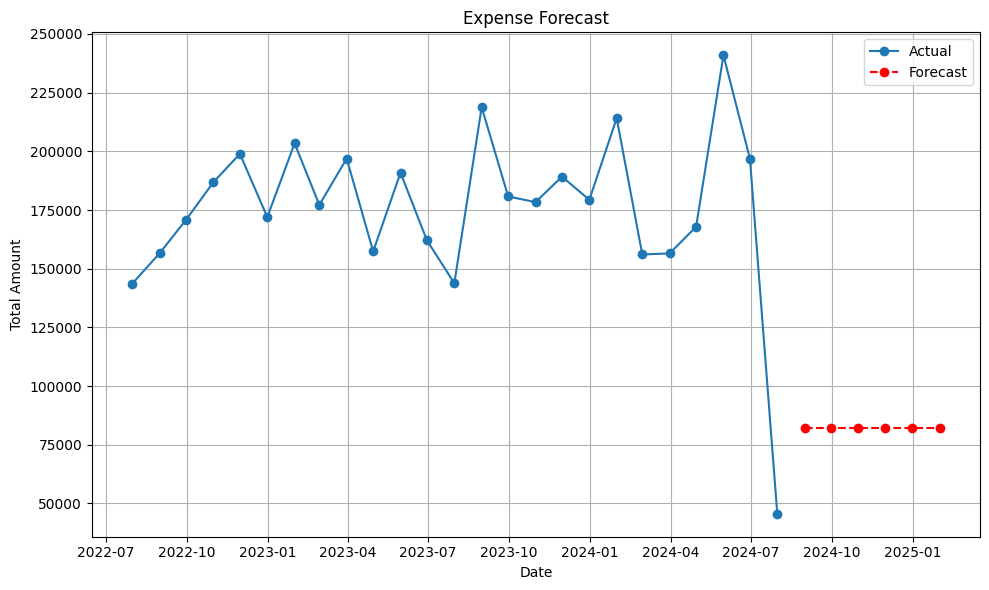

In [ ]:
# Forecast the next 6 months
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)[0]

# Create a date range for the forecast
forecast_dates = pd.date_range(start=monthly_expenses.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Create a DataFrame to store the forecast
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})
forecast_df.set_index('Date', inplace=True)

# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(monthly_expenses, marker='o', linestyle='-', label='Actual')
plt.plot(forecast_df, marker='o', linestyle='--', color='red', label='Forecast')
plt.title('Expense Forecast')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


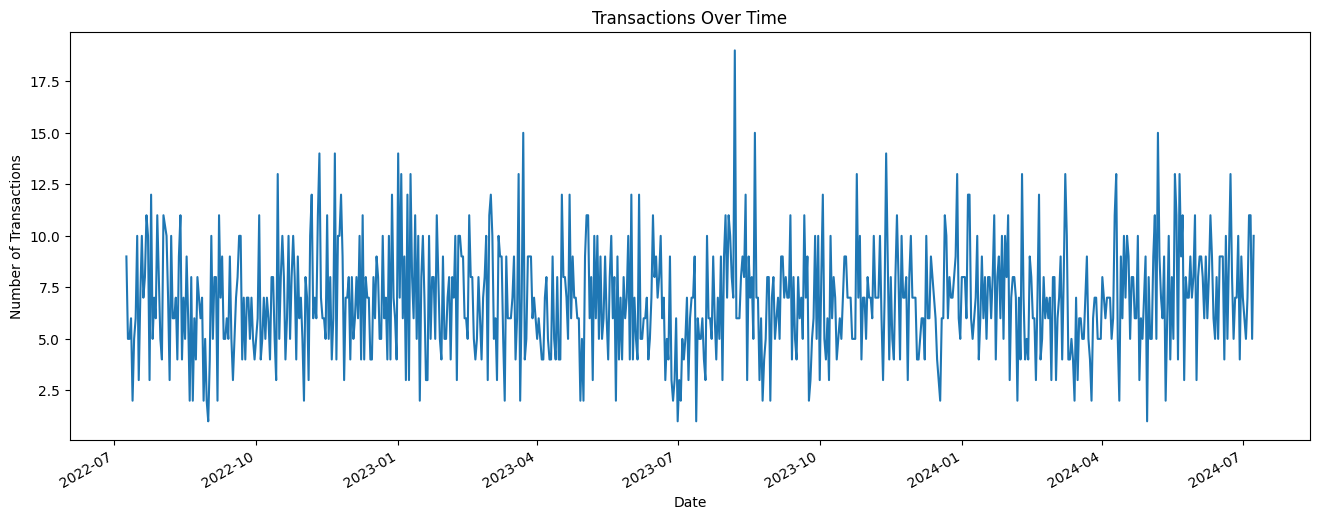

In [ ]:
plt.figure(figsize=(16, 6))
df['Date'].value_counts().sort_index().plot()
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

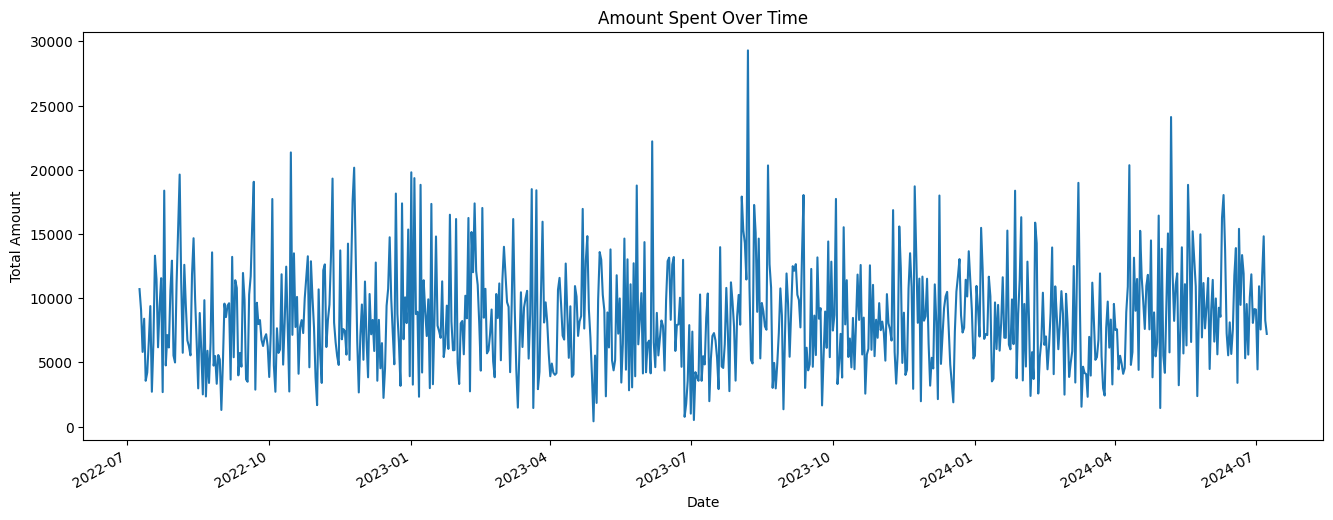

In [ ]:
# Trends in 'Amount' over time
plt.figure(figsize=(16, 6))
df.groupby('Date')['Amount'].sum().plot()
plt.title('Amount Spent Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

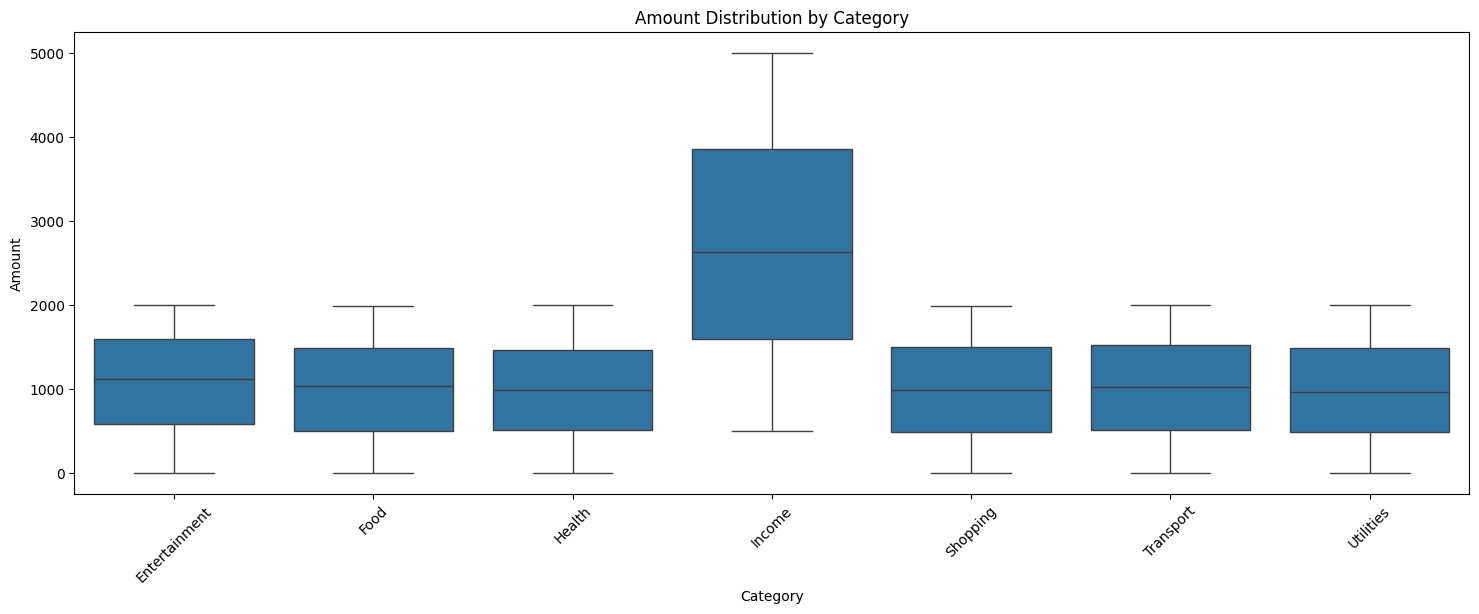

In [ ]:
# Box plots for 'Amount' across different categories
plt.figure(figsize=(18, 6))
sns.boxplot(x='Category', y='Amount', data=df)
plt.title('Amount Distribution by Category')
plt.xticks(rotation=45)
plt.show()


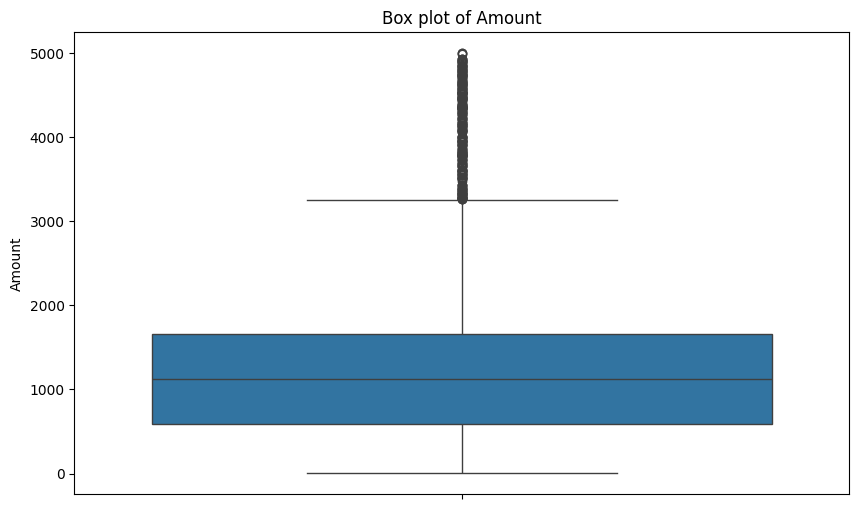

In [ ]:
# Box plot to identify outliers in 'Amount'
plt.figure(figsize=(10, 6))
sns.boxplot(df['Amount'])
plt.title('Box plot of Amount')
plt.show()

In [ ]:
# If outliers are present, we can handle them (e.g., by capping):
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Amount'] = np.where(df['Amount'] > upper_bound, upper_bound, df['Amount'])

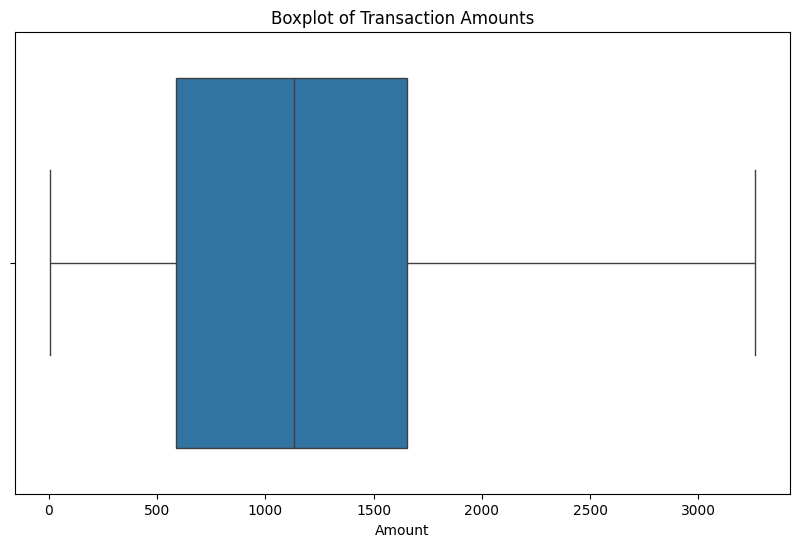

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()

## Extract Features from 'Date'

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

## Time Series Forecasting

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
# Split the data into train and test sets
train_size = int(len(df_daily) * 0.8)
train, test = df_daily[:train_size], df_daily[train_size:]

# Print the sizes of the train and test sets
print(f"Train size: {len(train)}, Test size: {len(test)}")


Train size: 584, Test size: 147


In [ ]:
# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) parameters can be tuned
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                  584
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5688.635
Date:                Fri, 12 Jul 2024   AIC                          11389.270
Time:                        10:20:12   BIC                          11415.479
Sample:                    07-09-2022   HQIC                         11399.485
                         - 02-12-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8962      0.038    -23.424      0.000      -0.971      -0.821
ar.L2         -0.7097      0.053    -13.416      0.000      -0.813      -0.606
ar.L3         -0.5689      0.061     -9.394      0.0

In [ ]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))
predictions = pd.Series(predictions, index=test.index)

# Print the first few predictions
print(predictions.head())


Date
2024-02-13    7793.740554
2024-02-14    8631.337966
2024-02-15    8621.866749
2024-02-16    7161.053324
2024-02-17    6713.693921
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 15117825.538036687
Root Mean Squared Error: 3888.164803353465


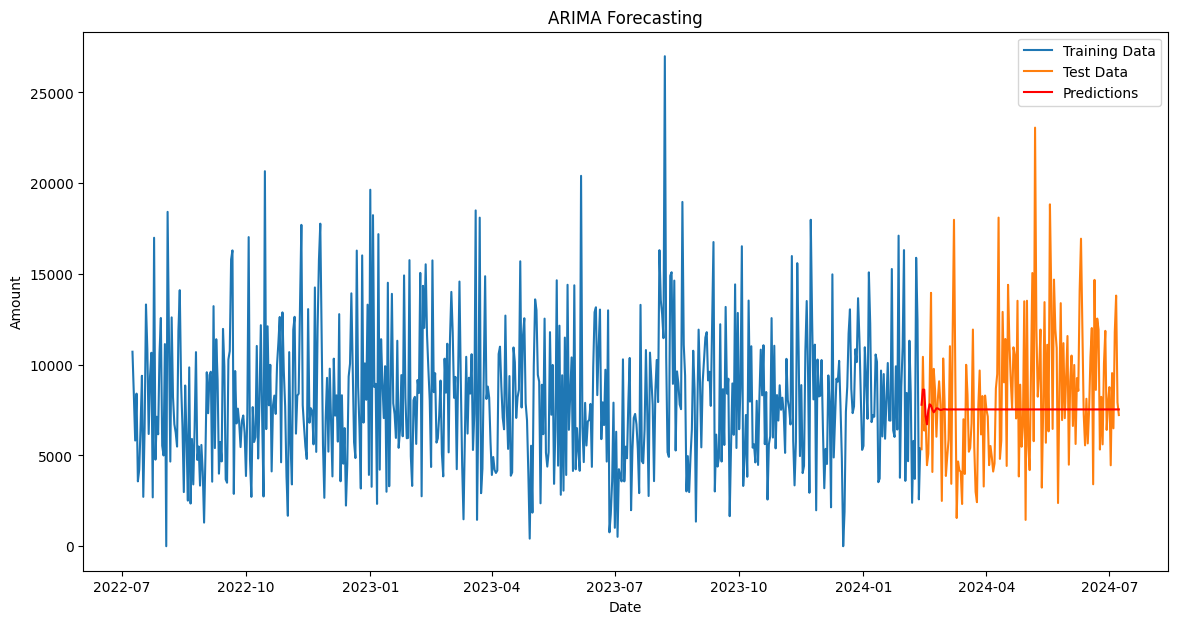

In [ ]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(predictions, label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()
